In [1]:
import random as r,csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

'''GENERATE DATA'''
N = 1000
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x","y"])
    i = 0
    while(i<N):
        x = np.random.uniform(-5,5)
        y = math.sin(x) + math.cos(x)
        writer.writerow([str(x),str(y)])
        i+=1
       


In [12]:
df = pd.read_csv('data.csv')
print(df.shape)

(1000, 2)


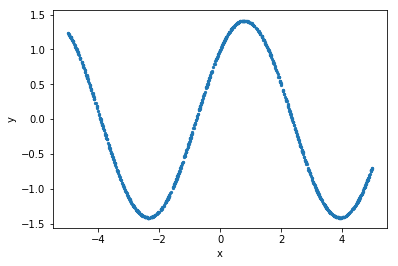

In [3]:
# plot data points to see figure

df.plot(kind='scatter',x='x',y='y',s=5)

In [4]:
N = len(df)

C = 1
d = 1
h = 10

u1 = np.random.rand(N,h+1)
v1 = np.random.rand(N,h+1)
u2 = np.random.rand(N,C)
v2 = np.random.rand(N,C)

w1 = np.random.rand(h+1,d+1)
w2 = np.random.rand(C,h+1)


print(w1)
print()
print(w2)
print()

df['x0'] = [1 for _ in range(N)]


ymax = df['y'].max()
ymin = df['y'].min()

df['y'] = (df['y'] - ymin)/(ymax - ymin)

X = df[['x0','x']].values
y = df[['y']].values

trainset = int(0.6*N)
testset = N - trainset


[[0.08051255 0.83567931]
 [0.09567264 0.1460207 ]
 [0.86213472 0.74147026]
 [0.52129944 0.16305984]
 [0.42819839 0.34529401]
 [0.18431766 0.94347277]
 [0.80825702 0.24638111]
 [0.51936676 0.82672088]
 [0.16110826 0.72136945]
 [0.35782753 0.20890534]
 [0.86566969 0.13044436]]

[[0.17276562 0.67039431 0.89318175 0.50473399 0.88887249 0.77630426
  0.1189185  0.69448919 0.15868921 0.22904089 0.76482383]]



In [5]:
import math
def phi(x):
    return 1/(1.0+math.exp(-x))

def dphi(x):
    return phi(x)*(1-phi(x))

def calcU1nj(n,j):
    s = 0
    for i in range(d+1):
        s += w1[j][i]*X[n][i]
    return s

def calcU2nk(n,k):
    s = 0
    for j in range(h+1):
        s += w2[k][j]*v1[n][j]
    return s

In [6]:
# Algorithm
epochs = 500
eta = 0.1
errors = []
error = 10**5 ; e = 0
for e in range(epochs):
    error = 0
    e += 1
    for n in range(trainset):
        for j in range(1,h+1):
            u1[n][j] = calcU1nj(n,j)
            v1[n][j] = phi(u1[n][j])
        err = 0
        for k in range(C):
            u2[n][k] = calcU2nk(n,k)
            v2[n][k] = phi(u2[n][k])
            err += (1/2)*((v2[n][k] - y[n][k])**2)
        
        error += err
        # Backprop
        for k in range(C):
            for j in range(h+1):
                w2[k][j] += eta*(y[n][k]-v2[n][k])*dphi(u2[n][k])*v1[n][j]
        for i in range(d+1):
            for j in range(1,h+1):
                w1[j][i] += eta*dphi(u1[n][j])*X[n][i]*sum([(y[n][k] - v2[n][k])*dphi(u2[n][k])*w2[k][j] for k in range(C)])
    error = error/trainset
    print("Epoch :", e, "Training Error : ", error)
    errors.append(error)


Epoch : 1 Training Error :  0.1010145866122802
Epoch : 2 Training Error :  0.058053361430605965
Epoch : 3 Training Error :  0.05521311276117108
Epoch : 4 Training Error :  0.05149163669903486
Epoch : 5 Training Error :  0.04663582358075771
Epoch : 6 Training Error :  0.04128589033084286
Epoch : 7 Training Error :  0.03599092276546201
Epoch : 8 Training Error :  0.03108455790683087
Epoch : 9 Training Error :  0.02681407834563215
Epoch : 10 Training Error :  0.023269699732482673
Epoch : 11 Training Error :  0.02040505242949674
Epoch : 12 Training Error :  0.018109200017091102
Epoch : 13 Training Error :  0.016264929821483688
Epoch : 14 Training Error :  0.014774307852854834
Epoch : 15 Training Error :  0.013560257748330045
Epoch : 16 Training Error :  0.012561430076765212
Epoch : 17 Training Error :  0.011729240781793977
Epoch : 18 Training Error :  0.011026273941088767
Epoch : 19 Training Error :  0.010424363727450961
Epoch : 20 Training Error :  0.009902459917306615
Epoch : 21 Training

Epoch : 164 Training Error :  0.001198995988174829
Epoch : 165 Training Error :  0.0011920969509328352
Epoch : 166 Training Error :  0.001185325908216361
Epoch : 167 Training Error :  0.0011786802730813612
Epoch : 168 Training Error :  0.0011721575165182289
Epoch : 169 Training Error :  0.0011657551659940812
Epoch : 170 Training Error :  0.001159470804027237
Epoch : 171 Training Error :  0.0011533020667937532
Epoch : 172 Training Error :  0.0011472466427658809
Epoch : 173 Training Error :  0.0011413022713822516
Epoch : 174 Training Error :  0.001135466741749639
Epoch : 175 Training Error :  0.0011297378913760405
Epoch : 176 Training Error :  0.0011241136049349241
Epoch : 177 Training Error :  0.0011185918130603351
Epoch : 178 Training Error :  0.001113170491172602
Epoch : 179 Training Error :  0.0011078476583343587
Epoch : 180 Training Error :  0.001102621376136571
Epoch : 181 Training Error :  0.0010974897476141924
Epoch : 182 Training Error :  0.0010924509161911085
Epoch : 183 Traini

Epoch : 324 Training Error :  0.0008224776806826143
Epoch : 325 Training Error :  0.0008218853601267273
Epoch : 326 Training Error :  0.000821299213005423
Epoch : 327 Training Error :  0.000820719140249565
Epoch : 328 Training Error :  0.0008201450448873643
Epoch : 329 Training Error :  0.0008195768320006096
Epoch : 330 Training Error :  0.0008190144086816345
Epoch : 331 Training Error :  0.0008184576839909964
Epoch : 332 Training Error :  0.0008179065689158818
Epoch : 333 Training Error :  0.0008173609763291958
Epoch : 334 Training Error :  0.0008168208209493395
Epoch : 335 Training Error :  0.0008162860193006633
Epoch : 336 Training Error :  0.000815756489674569
Epoch : 337 Training Error :  0.0008152321520912706
Epoch : 338 Training Error :  0.0008147129282621852
Epoch : 339 Training Error :  0.000814198741552956
Epoch : 340 Training Error :  0.0008136895169470953
Epoch : 341 Training Error :  0.0008131851810102259
Epoch : 342 Training Error :  0.0008126856618549346
Epoch : 343 Trai

Epoch : 482 Training Error :  0.0007713246323242319
Epoch : 483 Training Error :  0.0007711538195772314
Epoch : 484 Training Error :  0.0007709840724568506
Epoch : 485 Training Error :  0.0007708153813014104
Epoch : 486 Training Error :  0.0007706477365432958
Epoch : 487 Training Error :  0.000770481128707968
Epoch : 488 Training Error :  0.0007703155484130324
Epoch : 489 Training Error :  0.0007701509863672849
Epoch : 490 Training Error :  0.0007699874333697869
Epoch : 491 Training Error :  0.0007698248803089408
Epoch : 492 Training Error :  0.0007696633181615821
Epoch : 493 Training Error :  0.0007695027379920807
Epoch : 494 Training Error :  0.0007693431309514599
Epoch : 495 Training Error :  0.0007691844882765077
Epoch : 496 Training Error :  0.000769026801288915
Epoch : 497 Training Error :  0.0007688700613944119
Epoch : 498 Training Error :  0.0007687142600819302
Epoch : 499 Training Error :  0.0007685593889227521
Epoch : 500 Training Error :  0.000768405439569681


Optimal w1 : 
 [[ 0.08051255  0.83567931]
 [-0.58339382 -0.67231575]
 [ 4.62825117  2.82959464]
 [ 1.88373112  0.62609631]
 [ 1.66584753  0.59932147]
 [-0.04717256  3.18850175]
 [ 3.36082395  0.91934421]
 [ 1.29855757  1.67482952]
 [-3.93278993  1.74666266]
 [ 0.353763    0.68548461]
 [ 2.34908653  0.70466757]]
Optimal w2 : 
 [[-5.26303456e-03  5.00913534e+00  6.11313896e+00 -2.71192365e+00
  -2.29564611e+00  4.50067021e+00 -3.68258582e+00  4.26381775e+00
  -4.43607430e+00 -2.70118582e+00 -2.16866543e+00]]


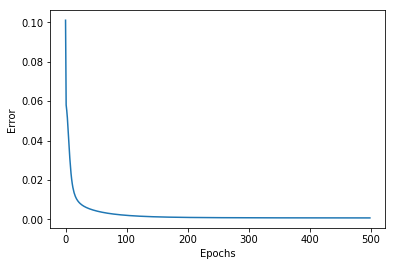

In [7]:
# plot to see how the gradient descent works

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(len(errors)),errors)
print("Optimal w1 : \n",w1)
print("Optimal w2 : \n",w2)

Average error :  0.0009589609733417865


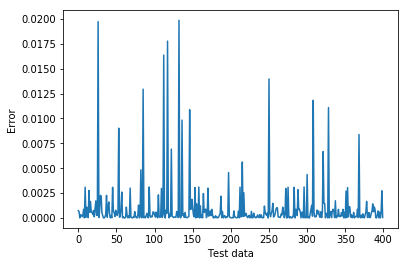

In [8]:
# testing
testerrors = []
correct = 0
xtest = []
ytest = []
for n in range(trainset,N):
    xtest.append(X[n][1])
    for j in range(1,h+1):
        u1[n][j] = calcU1nj(n,j)
        v1[n][j] = phi(u1[n][j])
    error = 0
    for k in range(C):
        u2[n][k] = calcU2nk(n,k)
        v2[n][k] = phi(u2[n][k])
        error += (v2[n][k] - y[n][k])**2
    ytest.append(ymin + v2[n][0]*(ymax-ymin))
    
   
    testerrors.append(error/2)

plt.xlabel('Test data')
plt.ylabel('Error')
plt.plot(range(len(testerrors)),testerrors)
print("Average error : ",sum(testerrors)/len(testerrors))

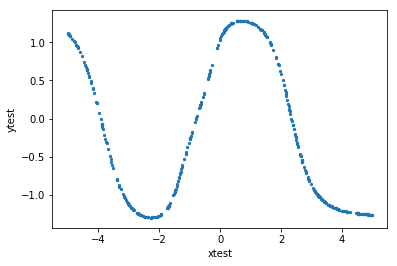

In [9]:
# Plot test data to see if function is learnt
# produces the graph quite accurately! :)
plt.xlabel('xtest')
plt.ylabel('ytest')
plt.scatter(xtest,ytest,s=5)